In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
# first load the processed data

df = pd.read_parquet("data/processed/thickener_timeseries.parquet")
print("filas, columnas:", df.shape)
print("columnas: \n",df.columns)
print("event_rate:", df["event_now"].mean())
print("target_event_30m rate:", df["target_event_30m"].mean())
nulos = df.isnull().mean() * 100
print("Columnas con nulos (%): \n", nulos[nulos > 0].sort_values(ascending=False))
display(df.head(8))

filas, columnas: (25920, 25)
columnas: 
 Index(['timestamp', 'Qf_pulp_m3h', 'Qf_dilution_m3h', 'Qf_total_m3h', 'Qf_m3h',
       'Solids_f_pct', 'FeedDilution_On', 'FeedDilution_factor',
       'PSD_fines_idx', 'Floc_gpt', 'UF_capacity_factor', 'Qu_m3h',
       'Solids_u_pct', 'BedLevel_m', 'RakeTorque_pct',
       'Overflow_Turb_NTU_clean', 'Overflow_Turb_NTU', 'ControlMode',
       'OperatorAction', 'spec_limit_NTU', 'event_limit_NTU', 'event_now',
       'event_type', 'Regime', 'target_event_30m'],
      dtype='str')
event_rate: 0.04876543209876543
target_event_30m rate: 0.04876543209876543
Columnas con nulos (%): 
 Qf_m3h               0.999228
Solids_u_pct         0.999228
Overflow_Turb_NTU    0.999228
dtype: float64


,timestamp,Qf_pulp_m3h,Qf_dilution_m3h,Qf_total_m3h,Qf_m3h,Solids_f_pct,FeedDilution_On,FeedDilution_factor,PSD_fines_idx,Floc_gpt,...,Overflow_Turb_NTU_clean,Overflow_Turb_NTU,ControlMode,OperatorAction,spec_limit_NTU,event_limit_NTU,event_now,event_type,Regime,target_event_30m
0,2026-01-01 00:00:00,599.873690,0.0,599.873690,599.873690,13.108514,0,1.0,0.171623,17.388946,...,15.961888,15.961888,AUTO,NONE,80.0,70.0,0,NONE,NORMAL,0
1,2026-01-01 00:05:00,550.283167,0.0,550.283167,550.283167,13.416840,0,1.0,0.178542,15.023189,...,25.794768,25.794768,AUTO,NONE,80.0,70.0,0,NONE,NORMAL,0
2,2026-01-01 00:10:00,558.605725,0.0,558.605725,558.605725,12.231592,0,1.0,0.187776,15.488972,...,25.592248,25.592248,AUTO,NONE,80.0,70.0,0,NONE,NORMAL,0
3,2026-01-01 00:15:00,600.626605,0.0,600.626605,600.626605,14.164482,0,1.0,0.190259,16.477350,...,10.113586,10.113586,AUTO,NONE,80.0,70.0,0,NONE,NORMAL,0
4,2026-01-01 00:20:00,606.473918,0.0,606.473918,606.473918,14.398845,0,1.0,0.193663,20.175675,...,31.555087,31.555087,AUTO,NONE,80.0,70.0,0,NONE,NORMAL,0
5,2026-01-01 00:25:00,603.687537,0.0,603.687537,603.687537,15.428315,0,1.0,0.199481,19.760485,...,24.261706,24.261706,AUTO,NONE,80.0,70.0,0,NONE,NORMAL,0
6,2026-01-01 00:30:00,553.503554,0.0,553.503554,553.503554,15.374054,0,1.0,0.220458,17.959831,...,28.504845,28.504845,AUTO,NONE,80.0,70.0,0,NONE,NORMAL,0
7,2026-01-01 00:35:00,653.525518,0.0,653.525518,653.525518,15.016750,0,1.0,0.211827,19.427002,...,17.176037,17.176037,AUTO,NONE,80.0,70.0,0,NONE,NORMAL,0


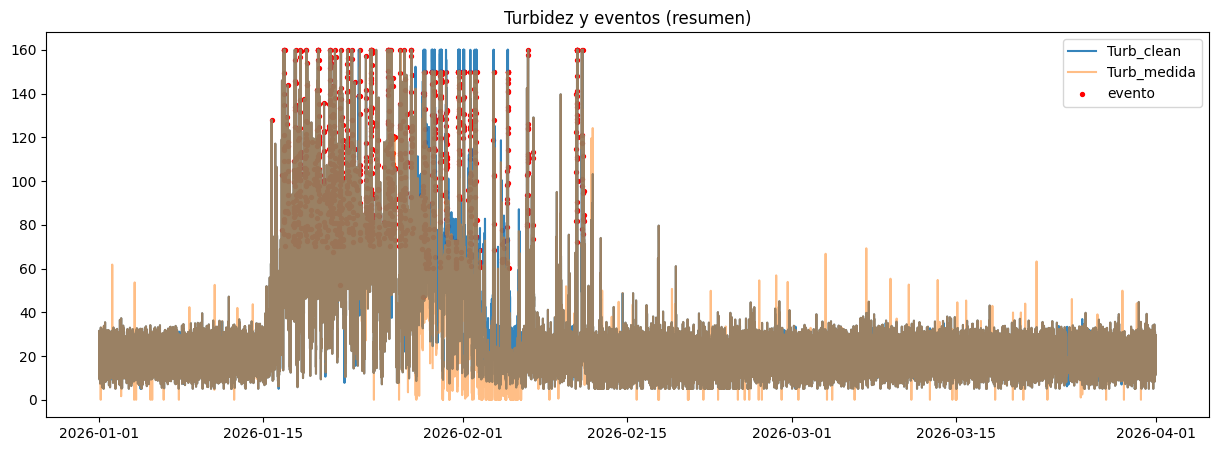

In [25]:
# 1) Time series con overlay de turbidez limpia vs medida y eventos
t = df["timestamp"]
plt.figure(figsize=(15, 5))
plt.plot(t,df["Overflow_Turb_NTU_clean"], label = "Turb_clean", alpha = 0.9)
plt.plot(t,df["Overflow_Turb_NTU"], label = "Turb_medida", alpha = 0.5)
plt.scatter(t[df["event_now"]==1], df["Overflow_Turb_NTU"][df["event_now"]==1], c="red", s=8, label = "evento")
plt.legend()
plt.title("Turbidez y eventos (resumen)")
plt.show()
